# Linear Regression

## Agenda

- How do I use the **pandas library** to read data into Python?
- How do I use the **seaborn library** to visualize data?
- What is **linear regression**, and how does it work?
- How do I **train and interpret** a linear regression model in scikit-learn?
- What are some **evaluation metrics** for regression problems?
- How do I choose **which features to include** in my model?

## Reading data using pandas

**Pandas:** popular Python library for data exploration, manipulation, and analysis

- Anaconda users: pandas is already installed
- Other users: [installation instructions](http://pandas.pydata.org/pandas-docs/stable/install.html)

In [81]:
# conventional way to import pandas
import pandas as pd

In [82]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv(r'D:\All_Data\Data\Advertising.csv', index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Primary object types:

- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column

In [83]:
# display the last 5 rows
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [84]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

## Visualizing data using seaborn

**Seaborn:** Python library for statistical data visualization built on top of Matplotlib

- Anaconda users: run **`conda install seaborn`** from the command line
- Other users: [installation instructions](http://seaborn.pydata.org/installing.html)

In [85]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

C:\Users\Sasmita\Anaconda3\envs\pytorchenv\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


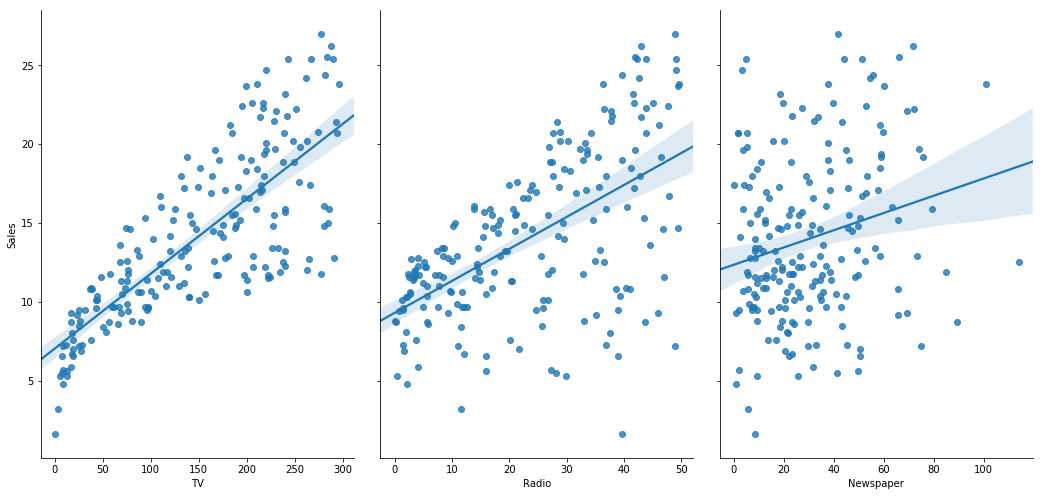

In [86]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

## Linear regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

## Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

- split ur datas into train and test
- import the algo from sklearn
- create an object
- fit--->train ur model
- predict--->test ur model

# Split ur data into train and test

In [87]:
 data.head(10)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [88]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]

In [89]:
y = data.Sales

In [90]:
X

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
6,8.7,48.9,75.0
7,57.5,32.8,23.5
8,120.2,19.6,11.6
9,8.6,2.1,1.0
10,199.8,2.6,21.2


In [91]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
6       7.2
7      11.8
8      13.2
9       4.8
10     10.6
11      8.6
12     17.4
13      9.2
14      9.7
15     19.0
16     22.4
17     12.5
18     24.4
19     11.3
20     14.6
21     18.0
22     12.5
23      5.6
24     15.5
25      9.7
26     12.0
27     15.0
28     15.9
29     18.9
30     10.5
       ... 
171     8.4
172    14.5
173     7.6
174    11.7
175    11.5
176    27.0
177    20.2
178    11.7
179    11.8
180    12.6
181    10.5
182    12.2
183     8.7
184    26.2
185    17.6
186    22.6
187    10.3
188    17.3
189    15.9
190     6.7
191    10.8
192     9.9
193     5.9
194    19.6
195    17.3
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64

In [92]:
200*0.70

140.0

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [94]:
X_train.shape

(140, 3)

In [95]:
X_train.head()

,TV,Radio,Newspaper
38,74.7,49.4,45.7
162,85.7,35.8,49.3
1,230.1,37.8,69.2
78,120.5,28.5,14.2
142,193.7,35.4,75.6


In [96]:
y_train.head()

38     14.7
162    13.3
1      22.1
78     14.2
142    19.2
Name: Sales, dtype: float64

In [97]:
y_train.shape

(140,)

In [98]:
X_test.shape

(60, 3)

## Linear regression in scikit-learn

In [99]:
# import model
from sklearn.linear_model import LinearRegression


In [100]:
# instantiate
linreg = LinearRegression()

### Training

In [101]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Interpreting model coefficients

In [66]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

3.484443564141097
[ 0.04476525  0.17615796 -0.00563008]


In [67]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.0447652503683441),
 ('Radio', 0.1761579615593902),
 ('Newspaper', -0.00563007808307557)]

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

How do we interpret the **TV coefficient** (0.0466)?

- For a given amount of Radio and Newspaper ad spending, **a "unit" increase in TV ad spending** is associated with a **0.0466 "unit" increase in Sales**.
- Or more clearly: For a given amount of Radio and Newspaper ad spending, **an additional $1,000 spent on TV ads** is associated with an **increase in sales of 46.6 items**.

Important notes:

- This is a statement of **association**, not **causation**.
- If an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

### Making predictions

In [68]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [69]:
y_pred

array([ 8.94037623, 20.75265048, 20.42632023, 12.32508003, 10.30723097,
       18.99024563,  8.73294548, 18.06078196, 13.84680954,  7.8649021 ,
        5.76856551, 19.46659052, 17.93394808, 12.20156825, 10.25394625,
       16.43585221, 14.1849852 , 22.75368011, 16.1427188 , 13.15171026,
       19.80981161, 15.46955162, 13.3497177 , 17.07368477,  6.59700458,
       20.73875583,  8.64014506, 20.1519133 ,  7.04586606, 17.04548935,
       12.27934253, 14.96254584, 16.35459043, 13.54869523, 18.97122079,
        4.88079807, 22.5793229 , 16.0633694 , 16.95991389, 12.09069527,
        9.94936763,  9.90357411,  9.64972285, 23.52948231, 17.17209382,
       20.22810589, 19.48530174, 23.20579178, 15.23614908, 14.06263962,
       11.5666455 , 16.62407183, 20.33647712, 23.11985721, 14.82497265,
        6.37409908, 14.04901847, 20.86758931,  7.97343659,  5.679322  ])

In [70]:
y_test

79      5.3
56     23.7
85     21.7
17     12.5
91     11.2
143    20.1
192     9.9
60     18.4
123    11.6
122     7.0
196     7.6
54     21.2
154    19.0
174    11.7
159     7.3
114    15.9
84     13.6
148    25.4
179    11.8
5      12.9
177    20.2
147    13.2
162    13.3
42     17.1
23      5.6
94     22.2
133     5.7
40     21.5
120     6.6
28     15.9
178    11.7
163    14.9
153    16.6
168    12.2
134    19.6
77      6.9
102    23.8
96     16.9
169    17.1
117    12.2
187    10.3
80     11.0
52     10.7
184    26.2
36     12.8
55     20.2
140    20.7
199    25.5
88     16.0
182    12.2
135    10.8
100    17.2
16     22.4
37     25.4
104    14.7
107     7.2
113    14.1
112    21.8
35      9.5
156     3.2
Name: Sales, dtype: float64

We need an **evaluation metric** in order to compare our predictions with the actual values!

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

In [71]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [72]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [73]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [74]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

## Feature selection

Does **Newspaper** "belong" in our model? In other words, does it improve the quality of our predictions?

Let's **remove it** from the model and check the RMSE!

In [78]:
# create a Python list of feature names
feature_cols = ['TV']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(linreg.score(X_train,y_train))
#display adjusted R-squared
print(1 - (1-linreg.score(X_train,y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

3.210929707703542
0.623827651655809
0.6212859465994294


In [79]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(linreg.score(X_train,y_train))
#display adjusted R-squared
print(1 - (1-linreg.score(X_train,y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

1.3879034699382886
0.8901498098117536
0.8886552494010291


In [80]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio','Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(linreg.score(X_train,y_train))
#display adjusted R-squared
print(1 - (1-linreg.score(X_train,y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

1.404651423032895
0.890307557755665
0.8880536034629731


The RMSE **decreased** when we removed Newspaper from the model. (Error is something we want to minimize, so **a lower number for RMSE is better**.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.